In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#import csv (includes MovieData.csv and API data)
combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
combined_df.dtypes

movie_name                   object
Country                      object
Release Date                 object
IMDB Rating                 float64
Metascore                   float64
TomatoMeter                  object
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
genre                        object
Total Box Office              int64
ROI                          object
dtype: object

In [4]:
#convert current ROI column from object type to float
combined_df["ROI"] = combined_df["ROI"].str.rstrip('%').astype('float') / 100.0

In [5]:
#totals of film genres
action_total = len(combined_df.loc[combined_df["genre"]== "Action"])
adventure_total = len(combined_df.loc[combined_df["genre"]== "Adventure"])
comedy_total = len(combined_df.loc[combined_df["genre"]== "Comedy"])
drama_total = len(combined_df.loc[combined_df["genre"]== "Drama"])
horror_total = len(combined_df.loc[combined_df["genre"]== "Horror"])
romantic_total = len(combined_df.loc[combined_df["genre"]== "Romantic Comedy"])
thriller_total = len(combined_df.loc[combined_df["genre"]== "Thriller/Suspense"])

print(action_total, adventure_total, comedy_total, drama_total, horror_total, romantic_total, thriller_total)

294 299 292 442 98 74 228


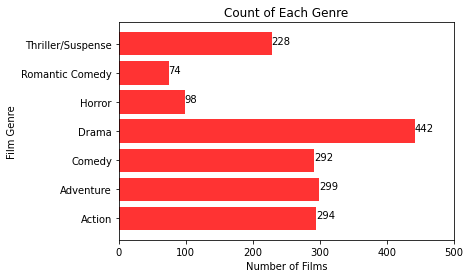

In [27]:
#plotting sum counts of genres
genre_totals = [action_total, adventure_total, comedy_total, drama_total, horror_total, romantic_total, thriller_total]
y_axis = np.arange(len(genre_totals))

plt.barh(y_axis, genre_totals, color='r', alpha=0.8, align="center")
tick_locations = [value for value in y_axis]

plt.yticks(tick_locations, ["Action", "Adventure", "Comedy", "Drama", "Horror", 
                            "Romantic Comedy", "Thriller/Suspense"], rotation=0)

plt.title("Count of Each Genre")
plt.ylabel("Film Genre")
plt.xlabel("Number of Films")

plt.xlim([0, 500])

for index, value in enumerate(genre_totals):
    plt.text(value, index, str(value))
    
plt.savefig("Project Images - Jeff/genre_count.png")

In [9]:
#run for theorized success percentage (ROI >= 277%)
successful_df = combined_df.loc[combined_df["ROI"] >= 2.77]

In [10]:
#totals of successful films per genre
action_success = len(successful_df.loc[successful_df["genre"]== "Action"])
adventure_success = len(successful_df.loc[successful_df["genre"]== "Adventure"])
comedy_success = len(successful_df.loc[successful_df["genre"]== "Comedy"])
drama_success = len(successful_df.loc[successful_df["genre"]== "Drama"])
horror_success = len(successful_df.loc[successful_df["genre"]== "Horror"])
romantic_success = len(successful_df.loc[successful_df["genre"]== "Romantic Comedy"])
thriller_success = len(successful_df.loc[successful_df["genre"]== "Thriller/Suspense"])

print(action_success, adventure_success, comedy_success, drama_success, 
      horror_success, romantic_success, thriller_success)


111 136 112 120 52 30 72


In [14]:
#calculating for percentage of total successful films per genre
pct_action = (action_success/action_total)*100
pct_adventure = (adventure_success/adventure_total)*100
pct_comedy = (comedy_success/comedy_total)*100
pct_drama = (drama_success/drama_total)*100
pct_horror = (horror_success/horror_total)*100
pct_romcom = (romantic_success/romantic_total)*100
pct_thriller = (thriller_success/thriller_total)*100

print(pct_action, pct_adventure, pct_comedy, pct_drama, pct_horror, pct_romcom, pct_thriller)

37.755102040816325 45.48494983277592 38.35616438356164 27.149321266968325 53.06122448979592 40.54054054054054 31.57894736842105


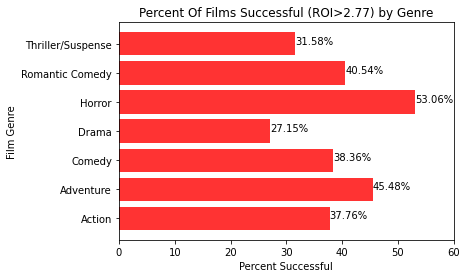

In [26]:
#plotting ROI success by Genre
genre_pcts = [pct_action, pct_adventure, pct_comedy, pct_drama, pct_horror, pct_romcom, pct_thriller]

y_axis = np.arange(len(genre_pcts))

plt.barh(y_axis, genre_pcts, color='r', alpha=0.8, align="center")
tick_locations = [value for value in y_axis]

plt.yticks(tick_locations, ["Action", "Adventure", "Comedy", "Drama", "Horror", 
                            "Romantic Comedy", "Thriller/Suspense"], rotation=0)

plt.title("Percent Of Films Successful (ROI>2.77) by Genre")
plt.ylabel("Film Genre")
plt.xlabel("Percent Successful")

plt.xlim([0, 60])

for index, value in enumerate(genre_pcts):
    plt.text(value, index, "{:.2f}%".format(value))

plt.savefig("Project Images - Jeff/genre277.png")

In [16]:
successful_df2 = combined_df.loc[combined_df["ROI"] >= 3.73]

In [17]:
#totals of successful films per genre
action_success2 = len(successful_df2.loc[successful_df2["genre"]== "Action"])
adventure_success2 = len(successful_df2.loc[successful_df2["genre"]== "Adventure"])
comedy_success2 = len(successful_df2.loc[successful_df2["genre"]== "Comedy"])
drama_success2 = len(successful_df2.loc[successful_df2["genre"]== "Drama"])
horror_success2 = len(successful_df2.loc[successful_df2["genre"]== "Horror"])
romantic_success2 = len(successful_df2.loc[successful_df2["genre"]== "Romantic Comedy"])
thriller_success2 = len(successful_df2.loc[successful_df2["genre"]== "Thriller/Suspense"])

print(action_success2, adventure_success2, comedy_success2, drama_success2, 
      horror_success2, romantic_success2, thriller_success2)


72 92 69 83 41 23 47


In [18]:
#calculating for percentage of total successful films per genre
pct_action2 = (action_success2/action_total)*100
pct_adventure2 = (adventure_success2/adventure_total)*100
pct_comedy2 = (comedy_success2/comedy_total)*100
pct_drama2 = (drama_success2/drama_total)*100
pct_horror2 = (horror_success2/horror_total)*100
pct_romcom2 = (romantic_success2/romantic_total)*100
pct_thriller2 = (thriller_success2/thriller_total)*100

print(pct_action2, pct_adventure2, pct_comedy2, pct_drama2, pct_horror2, pct_romcom2, pct_thriller2)

24.489795918367346 30.76923076923077 23.63013698630137 18.778280542986426 41.83673469387755 31.08108108108108 20.614035087719298


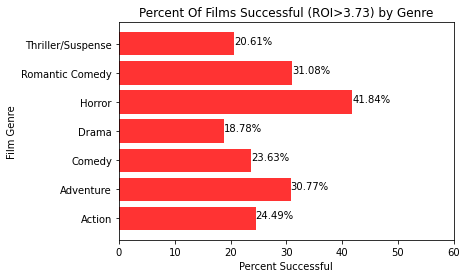

In [25]:
#plotting ROI success by Genre
genre_pcts2 = [pct_action2, pct_adventure2, pct_comedy2, pct_drama2, pct_horror2, pct_romcom2, pct_thriller2]

y_axis = np.arange(len(genre_pcts2))

plt.barh(y_axis, genre_pcts2, color='r', alpha=0.8, align="center")
tick_locations = [value for value in y_axis]

plt.yticks(tick_locations, ["Action", "Adventure", "Comedy", "Drama", "Horror", 
                            "Romantic Comedy", "Thriller/Suspense"], rotation=0)

plt.title("Percent Of Films Successful (ROI>3.73) by Genre")
plt.ylabel("Film Genre")
plt.xlabel("Percent Successful")

plt.xlim([0, 60])

for index, value in enumerate(genre_pcts2):
    plt.text(value, index, "{:.2f}%".format(value))

plt.savefig("Project Images - Jeff/genre373.png")

In [20]:
#top 50 
top_fifty = successful_df.sort_values("ROI", ascending=False)
top_fifty.head(50)
#or
#top_fifty = successful_df.nlargest(50, "ROI")
#top_fity

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
886,The Intouchables,France,02 Nov 2011,6.6,48.0,20%,10800000,13182281,471690764,R,Comedy,484873045,44.8957
704,The King's Speech,"UK, USA, Australia",25 Dec 2010,6.2,56.0,3%,15000000,138797449,292023719,R,Drama,430821168,28.7214
335,Slumdog Millionaire,"UK, USA, India",25 Dec 2008,8.0,84.0,37%,14000000,141330703,243199737,R,Drama,384530440,27.4665
1273,The Fault in Our Stars,USA,06 Jun 2014,7.1,69.0,89%,12000000,124872350,182294484,PG-13,Drama,307166834,25.5972
695,Black Swan,USA,17 Dec 2010,6.6,65.0,15%,13000000,106954678,224312032,R,Thriller/Suspense,331266710,25.4821
185,Halloween,USA,27 Oct 1978,7.8,87.0,96%,10000000,159342015,93797291,R,Horror,253139306,25.3139
187,Halloween,USA,27 Oct 1978,5.3,49.0,70%,10000000,159342015,93797291,R,Horror,253139306,25.3139
323,High School Musical 3,USA,24 Oct 2008,4.8,57.0,22%,11000000,90559416,183833464,G,Musical,274392880,24.9448
1574,La La Land,"USA, Hong Kong",25 Dec 2016,5.2,51.0,24%,20000000,151101803,275581874,PG-13,Musical,426683677,21.3342
1567,Annabelle: Creation,USA,11 Aug 2017,7.2,67.0,79%,15000000,102092201,203292664,R,Horror,305384865,20.3590
